In [19]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## KNN Library
from sklearn.neighbors import KNeighborsClassifier
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
### Keras and Tensor flow libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [3]:
data= pd.read_csv("weatherAUS.csv")
data.dropna(inplace=True)
data['RainTmr'] = np.where(data['RainTomorrow']=='Yes', '1', '0')
data['RainTod'] = np.where(data['RainToday']=='Yes', '1', '0')
##Splitting the Dataset 
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 20)
y_train=train_data['RainTmr']
y_test=test_data['RainTmr']
x_train=train_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']]
x_test=test_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']]
## Feature Scaling the train dataset
fea_scaling = preprocessing.StandardScaler().fit(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])
X_train = fea_scaling.transform(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])
## Feature scaling the test dataset
fea_scaling = preprocessing.StandardScaler().fit(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])
X_test = fea_scaling.transform(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  app.launch_new_instance()


TASK-1

0.5312452524434091
[[15544 15182]
 [ 3331  5437]]


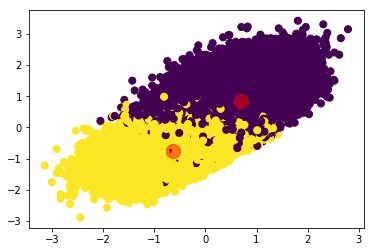

In [96]:
## K-Means Clustering Algorithm 
## Train Accuracy and Train Plot 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_train)):
    predict_me = np.array(X_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(X_train))
yp=kmeans.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
print(confusion_matrix(y,yp))

0.531549096065225
[[6720 6547]
 [1382 2277]]


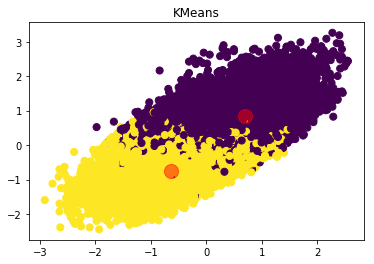

In [97]:
## Test Accuracy and Test Plot
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_test)):
    predict_me = np.array(X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(X_test))
yp=kmeans.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')
print(confusion_matrix(y,yp))

In [33]:
## Feature Selection
### Forward Selection 
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=12,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=2)
features = feature_selector.fit(X_train,y_train)
filtered_features= x_train.columns[list(features.k_feature_idx_)]  
filtered_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators wi

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.5s finished

[2019-05-06 13:08:47] Features: 7/12 -- score: 0.8440208444392656[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarn

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'RainTod'],
      dtype='object')

In [36]:
## Performing PCA, ICA and Randomized Projections
x=x_train[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'RainTod']]
xt=x_test[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'RainTod']]
x= preprocessing.StandardScaler().fit_transform(x)
xt= preprocessing.StandardScaler().fit_transform(xt)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_train =pca.fit_transform(x)
pca_test=pca.fit_transform(xt)
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6)
ica_train =ica.fit_transform(x)
ica_test=ica.fit_transform(xt)
from sklearn.random_projection import GaussianRandomProjection
rca = GaussianRandomProjection(n_components=6, eps=0.1, random_state=420)
rca_train =rca.fit_transform(x)
rca_test=rca.fit_transform(xt)

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.33529143667392514


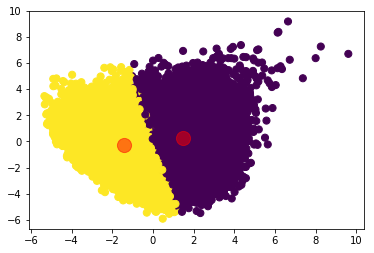

In [100]:
## K-Means Clustering Algorithm using PCA
## Train Accuracy and Train Plot 
kmeans.fit(pca_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(pca_train)):
    predict_me = np.array(pca_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(pca_train))
yp=kmeans.predict(pca_train)
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

0.3509984639016897


Text(0.5, 1.0, 'KMeans')

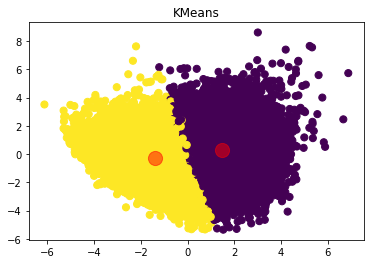

In [101]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(pca_test)):
    predict_me = np.array(pca_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(pca_test))
yp=kmeans.predict(pca_test)
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.6163214665518812


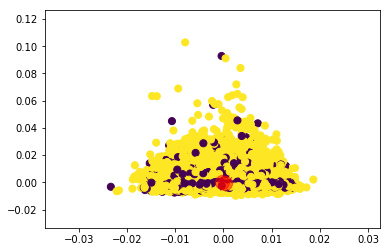

In [102]:
## K-Means Clustering Algorithm using ICA
## Train Accuracy and Train Plot 
kmeans.fit(ica_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(ica_train)):
    predict_me = np.array(ica_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(ica_train))
yp=kmeans.predict(ica_train)
plt.scatter(ica_train[:, 0], ica_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

0.5311946118397731


Text(0.5, 1.0, 'KMeans')

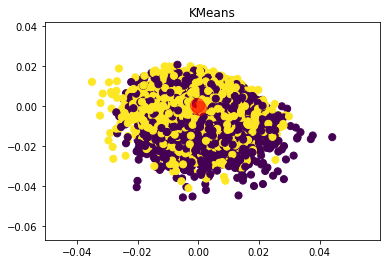

In [103]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(ica_test)):
    predict_me = np.array(ica_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(ica_test))
yp=kmeans.predict(ica_test)
plt.scatter(ica_test[:, 0], ica_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.5299792373525093


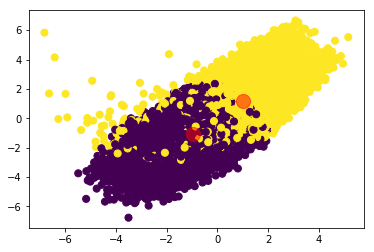

In [105]:
## K-Means Clustering Algorithm using RCA
## Train Accuracy and Train Plot 
kmeans.fit(rca_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(rca_train)):
    predict_me = np.array(rca_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(rca_train))
yp=kmeans.predict(rca_train)
plt.scatter(rca_train[:, 0], rca_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

0.5258773484579936


Text(0.5, 1.0, 'KMeans')

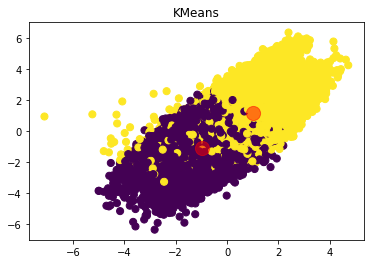

In [106]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(rca_test)):
    predict_me = np.array(rca_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(rca_test))
yp=kmeans.predict(rca_test)
plt.scatter(rca_test[:, 0], rca_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

In [44]:
### Performing Neural Networks with PCA as it gave the best results. 

input_shap=6
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(pca_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(pca_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test_array=np.array(y_test)
y_test_array= y_test_array.astype(float)
print(confusion_matrix(y_test_array,y_predict))  
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(pca_train)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
y_train_array=np.array(y_train)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
39494/39494 [==============================] - 9s 217us/step - loss: 0.3927 - acc: 0.8185
Epoch 2/10
39494/39494 [==============================] - 7s 168us/step - loss: 0.3704 - acc: 0.8357
Epoch 3/10
39494/39494 [==============================] - 6s 159us/step - loss: 0.3699 - acc: 0.8355
Epoch 4/10
39494/39494 [==============================] - 6s 154us/step - loss: 0.3696 - acc: 0.8363
Epoch 5/10
39494/39494 [==============================] - 5s 129us/step - loss: 0.3689 - acc: 0.8367
Epoch 6/10
39494/39494 [==============================] - 5s 117us/step - loss: 0.3690 - acc: 0.8361
Epoch 7/10
39494/39494 [==============================] - 5s 117us/step - loss: 0.3691 - acc: 0.8363
Epoch 8/10
39494/39494 [==============================] - 6s 139us/step - loss: 0.3688 - acc: 0.8358
Epoch 9/10
39494/39494 [==============================] - 6s 159us/step - loss: 0.3688 - acc: 0.8355
Epoch 10/10
39494/39494 [==================

Text(0.5, 1.0, 'Train and Test Accuracy for various Models')

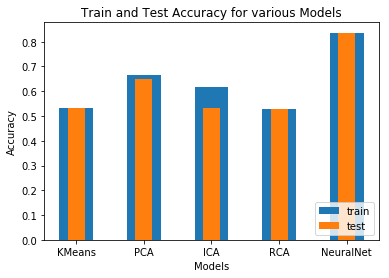

In [45]:
 ### Train and Test Error graph between all the algorithms
train_accuracy = [0.5308,0.6647,0.6161,0.5303,0.8364]
test_accuracy=[0.5311,0.6490,0.5313,0.5263,0.8340]
Models =['KMeans','PCA','ICA','RCA','NeuralNet']
plt.bar(Models,train_accuracy,label='train',width=0.5)
plt.bar(Models,test_accuracy,label='test',width=0.25)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Models")

Expectation Maximization

[[14333 16393]
 [ 3606  5162]]
0.4936192839418646


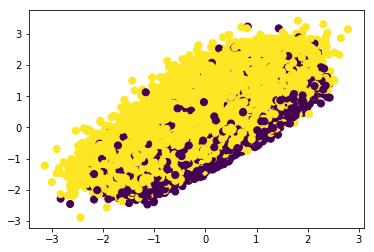

In [98]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
y=np.array(y_train)
y=y.astype(float)
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(X_train)
em_pred = em.predict(X_train)
em_probs = em.predict_proba(X_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=50, cmap='viridis_r')

[[6183 7084]
 [1489 2170]]
0.4935011225333806


Text(0.5, 1.0, 'Expectation Maximization')

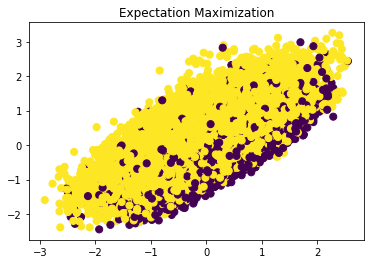

In [99]:
## Expectation maximization analysis on Test set
y=np.array(y_test)
y=y.astype(float)
em_pred1 = em.predict(X_test)
em_probs1 = em.predict_proba(X_test)
print(confusion_matrix(y,em_pred1))
print(accuracy_score(y,em_pred1))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[16292 14434]
 [ 1133  7635]]
0.6058388615992303


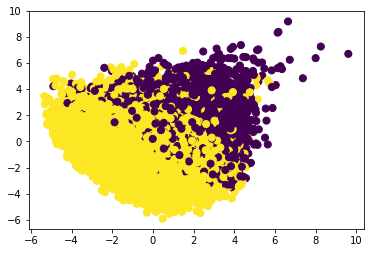

In [107]:
### Analysis for pca data
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(pca_train)
em_pred = em.predict(pca_train)
em_probs = em.predict_proba(pca_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y, s=50, cmap='viridis_r')

[[6919 6348]
 [ 507 3152]]
0.5950017724211273


Text(0.5, 1.0, 'Expectation Maximization')

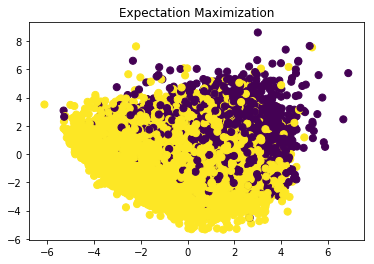

In [108]:
## Test Data 
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(pca_test)
em_probs = em.predict_proba(pca_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[14427 16299]
 [ 3715  5053]]
0.4932394794145946


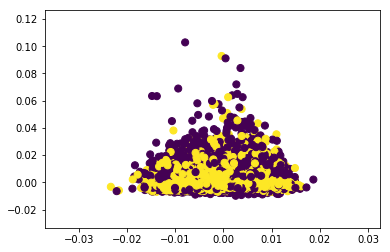

In [109]:
## Analysis of ICA
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(ica_train)
em_pred = em.predict(ica_train)
em_probs = em.predict_proba(ica_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_train[:, 0], ica_train[:, 1], c=y, s=50, cmap='viridis_r')

[[6114 7153]
 [1814 1845]]
0.47022332506203474


Text(0.5, 1.0, 'Expectation Maximization')

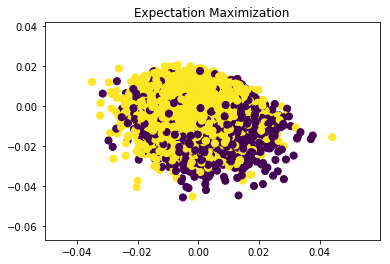

In [110]:
## Test Data
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(ica_test)
em_probs = em.predict_proba(ica_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_test[:, 0], ica_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[16214 14512]
 [ 3907  4861]]
0.5336253608143009


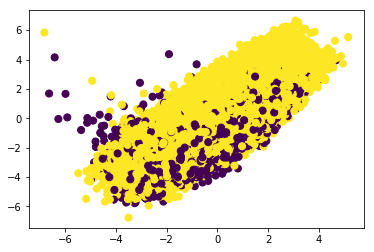

In [111]:
## Analysis of RCA
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(rca_train)
em_pred = em.predict(rca_train)
em_probs = em.predict_proba(rca_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_train[:, 0], rca_train[:, 1], c=y, s=50, cmap='viridis_r')

[[6987 6280]
 [1664 1995]]
0.5306628855015951


Text(0.5, 1.0, 'Expectation Maximization')

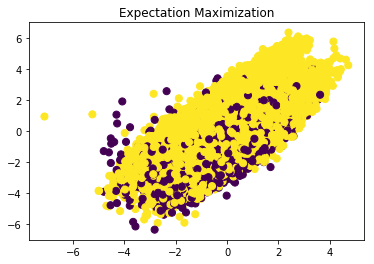

In [112]:
## Test Data
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(rca_test)
em_probs = em.predict_proba(rca_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_test[:, 0], rca_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

Text(0.5, 1.0, 'Train and Test Accuracy for various Models')

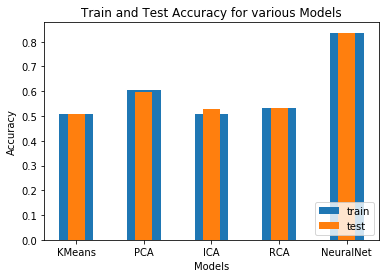

In [58]:
### Train and Test Error graph between all the algorithms
train_accuracy = [0.5064,0.6058,0.5068,0.5336,0.8364]
test_accuracy=[0.5065,0.5950,0.5297,0.5306,0.8340]
Models =['KMeans','PCA','ICA','RCA','NeuralNet']
plt.bar(Models,train_accuracy,label='train',width=0.5)
plt.bar(Models,test_accuracy,label='test',width=0.25)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Models")

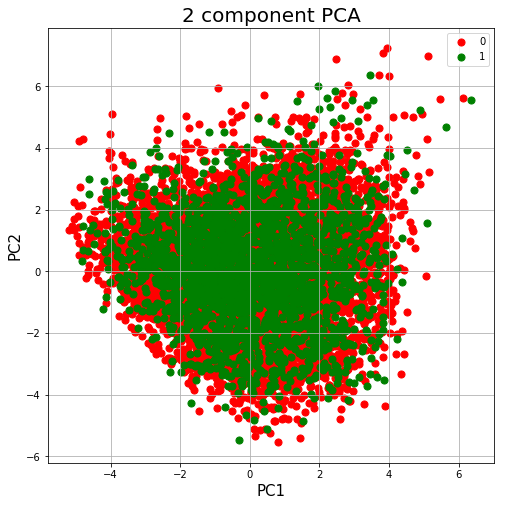

In [59]:
principalDf = pd.DataFrame(data = pca_train
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])
finalDf=pd.concat([principalDf, y_train], axis = 1)
finalDf=finalDf.fillna(1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0','1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['RainTmr'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

TASK-5

In [87]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_train)
kmeans=kmeans.predict(pca_train)
em.fit(pca_train)
probs_em=em.predict_proba(pca_train)
new = pd.DataFrame()
d = pd.DataFrame({"KM_Pred": kmeans,"EM_Prob": probs_em[:,0],"y": y_train})
new=new.append(d)

In [88]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_test)
kmeans1=kmeans.predict(pca_test)
em.fit(pca_test)
probs_em1=em.predict_proba(pca_test)
new1 = pd.DataFrame()
d1 = pd.DataFrame({"KM_Pred": kmeans1,"EM_Prob": probs_em1[:,0],"y": y_test})
new1 = new.append(d1)

In [89]:
trainy=new.drop(columns=['KM_Pred','EM_Prob'],axis=1)
trainy=np.array(trainy)
trainy=trainy.astype(float)
testy=new1.drop(columns=['KM_Pred','EM_Prob'],axis=1)
testy=np.array(testy)
testy=testy.astype(float)

In [90]:
trainx=new.drop(columns=['y'],axis=1)
trainx=np.array(trainx)
trainx=trainx.astype(float)
testx=new1.drop(columns=['y'],axis=1)
testx=np.array(testx)
testx=testx.astype(float)

In [113]:
### Performing Neural Networks  

input_shap=2
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(trainx, trainy, batch_size = 10, epochs = 10)
y_predict = classifier.predict(testx)
y_predict = np.where(y_predict > 0.5,1,0)
y_test_array= np.array(testy)
y_test_array= y_test_array.astype(float) 
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(trainx)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
y_train_array=np.array(trainy)
y_train_array= y_train_array.astype(float) 
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/10
39494/39494 [==============================] - 3s 87us/step - loss: 0.4554 - acc: 0.7780
Epoch 2/10
39494/39494 [==============================] - ETA: 0s - loss: 0.4406 - acc: 0.778 - ETA: 0s - loss: 0.4406 - acc: 0.778 - 3s 74us/step - loss: 0.4406 - acc: 0.7780
Epoch 3/10
39494/39494 [==============================] - 3s 74us/step - loss: 0.4405 - acc: 0.7780
Epoch 4/10
39494/39494 [==============================] - 3s 74us/step - loss: 0.4406 - acc: 0.7780
Epoch 5/10
39494/39494 [==============================] - 3s 74us/step - loss: 0.4406 - acc: 0.7780
Epoch 6/10
39494/39494 [==============================] - 3s 74us/step - loss: 0.4405 - acc: 0.7780
Epoch 7/10
39494/39494 [==============================] - 3s 77us/step - loss: 0.4406 - acc: 0.7780
Epoch 8/10
39494/39494 [==============================] - 4s 94us/step - loss: 0.4405 - acc: 0.7780
Epoch 9/10
39494/39494 [==============================] - 4s 95us/step - loss: 0.4405 - acc: 0.7780
Epoch 10/10
39494/39494 

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     43993
         1.0       0.00      0.00      0.00     12427

   micro avg       0.78      0.78      0.78     56420
   macro avg       0.39      0.50      0.44     56420
weighted avg       0.61      0.78      0.68     56420

0.7797412265154201
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     30726
         1.0       0.00      0.00      0.00      8768

   micro avg       0.78      0.78      0.78     39494
   macro avg       0.39      0.50      0.44     39494
weighted avg       0.61      0.78      0.68     39494

0.7779915936597964


In [117]:
pca_train

array([[ 1.54610835,  0.60950337, -1.72591649, -1.65433454,  1.15094702,
        -0.14637789],
       [ 0.41216294, -0.91232507, -0.10244566, -0.83515601, -0.34117791,
         0.43806535],
       [ 2.72826168, -3.72149636, -0.70975891, -0.62093931,  0.49406659,
        -0.29675981],
       ...,
       [-0.7331909 , -0.85068921, -1.45118979, -0.52636631,  0.66291623,
         1.18122411],
       [-1.01802767, -1.80328286,  1.184264  ,  0.19304333, -1.33841075,
         0.40498219],
       [ 2.09848352,  1.0418522 , -1.28817928,  0.14599802,  1.20724723,
         0.40887811]])